# Demodulación FM Empleando Radios Definidas por Software para el curso EL4005

## Importamos las librerias

In [12]:
import struct
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fft import fft

In [2]:
#Lo que deben realizar es escoger uno de los archivos “muestras_XXXMHz.bin” y analizar el espectro
#de las muestras capturadas y obtener el audio de cada una de las estaciones en el archivo de muestras elegido. 
data_bin = open('muestras_88_9.bin', 'rb');
data_array = np.fromfile(data_bin, 'int8')

#I +j*Q, I parte real, Q parte imaginaria.
señal_,I,Q = [],[],[]

for i in range(0,len(data_array)-1,2):
    I.append(data_array[i])
    Q.append(data_array[i+1])
    señal_.append(data_array[i]+1j*data_array[i+1])
I=np.array(I)
Q=np.array(Q)

In [3]:
señal=np.array(señal_)

In [8]:

"""Una muestra del espectro se almacena como dos componentes: una es la componente en fase
(I) y la otra es la componente en cuadratura (Q).
 Cada componente es de 8 bits y están representadas como signed ints.
 Las muestras están concatenadas, es decir, la n-ésima muestra de la componente en fase (8
bits) es seguida por la n-ésima muestra de la componente en cuadratura (8 bits), lo cual da que
la muestra total (ambas componentes) es de 16 bits.
#qq se refiere que lee 2 enteros de 8 bits cada uno.
print(int(len(data)/16))
señal= []
for i in range(int(len(data)/16)):
    I,Q=struct.unpack("@qq", data[16*i:16*(i+1)])
    # the complex data is  y = I + jQ.
    señal.append(I+1j*Q)
"""
señal[0:5]

array([-74.-119.j, -34. -10.j, -76. +79.j, -10. -80.j, -70.+105.j])

Text(0.5, 0, 'Frequency [hz]')

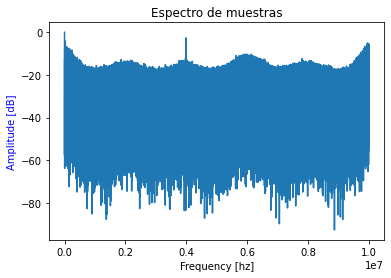

In [16]:
espectro = np.abs(fft(señal))
Espectro_normalizado=espectro/max(espectro);

plt.plot(20. * np.log10(Espectro_normalizado));
plt.title('Espectro de muestras')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [hz]')

In [5]:
"""
Tasa de muestreo: 1 MSamples/s.
 Número de muestras: 10 MSamples.
 Periodo de muestreo: 10 s.
"""
# fs corresponde a la frecuencia de muestreo
f, h = signal.freqz(señal,1,fs=1*10**6)

Se grafica el espectro en frecuencia

<ipython-input-6-d9cdb257b48b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


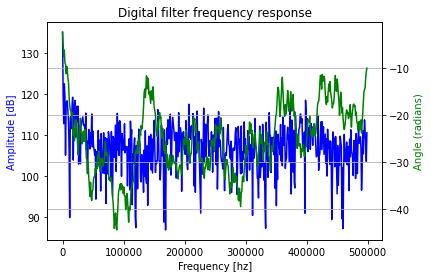

In [6]:
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

plt.plot(f , 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [hz]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(f, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()